In [1]:
from pathlib import Path
import pandas as pd

from plot_utils import plot_scatter_alt_vs_min, plot_boxplot_alt_vs_min

In [2]:
BASE_DIR = Path.cwd().parent.parent

# Resultados limitando a 10 resultados por query
RESULTS_PATH = BASE_DIR / "intersection_statistics_limited.csv"
assert RESULTS_PATH.exists(), f"Results file not found at {RESULTS_PATH}"

In [3]:
df = pd.read_csv(RESULTS_PATH)

In [4]:
df["intersected_list_sizes"] = df["intersected_list_sizes"].apply(lambda x: [int(size) for size in x.split(";")])
df["min_size"] = df["intersected_list_sizes"].apply(min)
df = df[["query_text", "alternation_complexity", "min_size", "intersected_list_sizes"]]


In [5]:
display(df.head())
print(f"Total de intersecciones: {len(df)}")
print(f"Total de queries: {df['query_text'].nunique()}")

,query_text,alternation_complexity,min_size,intersected_list_sizes
0,?x1 353 ?x2 . ?x2 226 ?x3 . ?x3 377 ?x4 . ?x1 ...,48,78,"[83, 78]"
1,?x1 1734 ?x2 . ?x2 2059 ?x3,3147,3659,"[34424, 3659]"
2,?x1 322 ?x2 . ?x1 541 ?x3 . ?x2 2059 ?x4 . ?x3...,3935,3659,"[76885, 3659]"
3,?x1 1652 ?x2 . ?x2 2027 ?x3 . ?x3 290 ?x4 . ?x...,60,63,"[821, 63]"
4,?y 1259 ?x . ?z 820 ?x,945,1405,"[1405, 9910]"


Total de intersecciones: 12775
Total de queries: 828


## Análisis Global

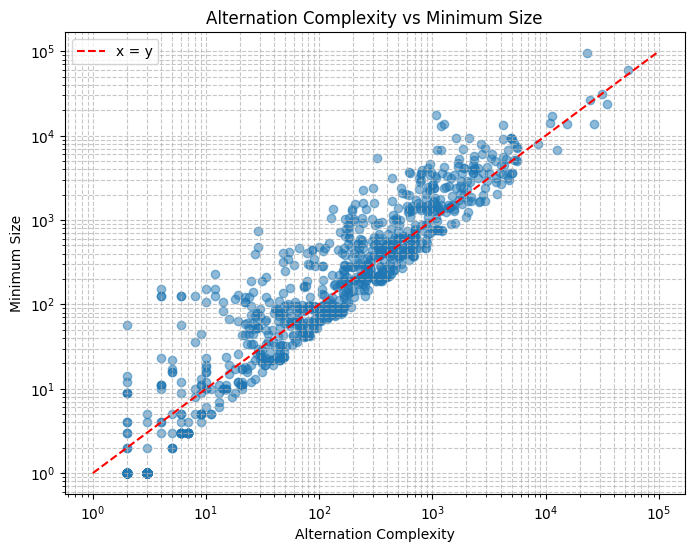

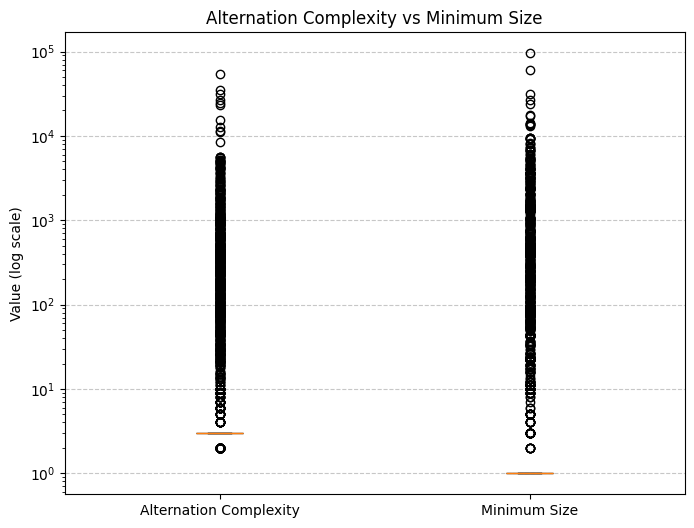

In [6]:
plot_scatter_alt_vs_min(df);
plot_boxplot_alt_vs_min(df);

## Análisis por Query

In [7]:
df_grouped = (
    df.drop("intersected_list_sizes", axis=1)
    .groupby("query_text")
    .agg({"alternation_complexity": "mean", "min_size": "mean"})
)

df_grouped.head()

,alternation_complexity,min_size
query_text,,
?x 1 ?y . ?x 933 ?z . ?x 524 ?u,5229.0,5137.0
?x 1005 ?y . ?x 241 ?z,411.0,219.0
?x 1019 ?y . ?x 2053 ?z . ?x 1194 ?u . ?x 313 ?v,53.0,102.0
?x 1075 ?y . ?x 191 ?z,167.0,251.0
?x 1078 ?y . ?x 1245 ?z . ?x 1184 ?u,263.0,352.0


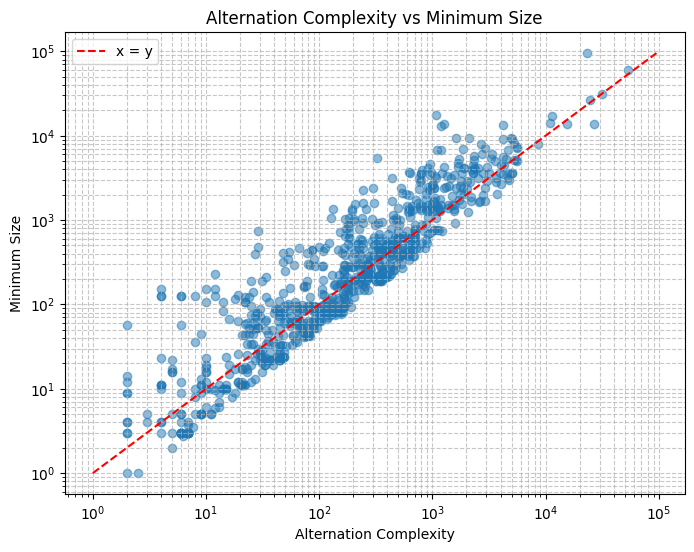

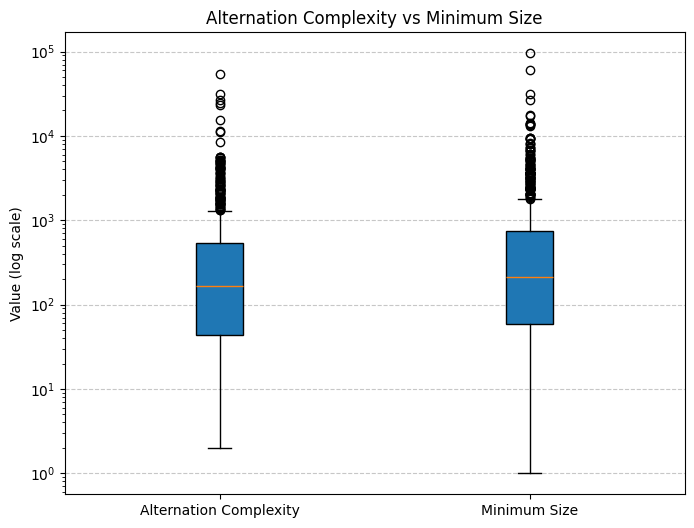

In [9]:
plot_scatter_alt_vs_min(df_grouped);
plot_boxplot_alt_vs_min(df_grouped);